In [5]:
import tensorflow as tf

import vgg19
from IPython.display import display
from IPython.display import Image
import numpy as np
from skimage import io, transform, color
import PIL
import scipy.io as sio
import xml.etree.ElementTree as ET
import cv2 as cv
import matplotlib.pyplot as plt

w = 224
h = 224
filename = '../Images/n02085620-Chihuahua/n02085620_1073.jpg'
img1 = cv.imread(filename)
img = transform.resize(img1, (w, h), 1, 'constant')
img = img.reshape((1, 224, 224, 3))
test = sio.loadmat('../data/test_data.mat')
cell = test['test_info'][0][0]
labels = cell[2]
images = cell[0]

In [6]:
codes = []
L = []
for i in range(len(labels)):
    label = labels[i][0]
    name = images[i][0][0]
    code = ""
    for j in range(len(name)):
        if(name[j] == '/'):
            break;
        code += name[j]
    codes.append(code)
    L.append(label)


In [7]:
codes = np.array(codes)
labels = np.array(labels)
unique_code = np.unique(codes)

npy file loaded
build model started
build model finished: 7s


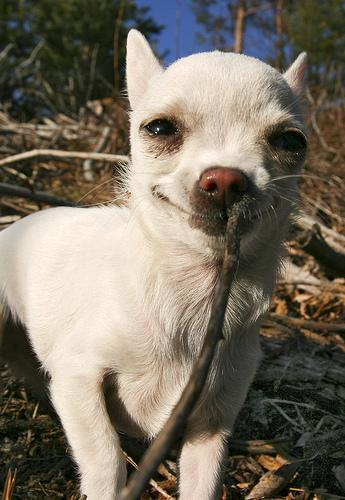

Predicted Result: Chihuahua with probability: 0.789946


In [8]:
# with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.7)))) as sess:
with tf.device('/cpu:0'):
    with tf.Session() as sess:
        images = tf.placeholder("float", [1, 224, 224, 3])
        feed_dict = {images: img}
        true_out = tf.placeholder(tf.float32, [None, 120])
        vgg = vgg19.Vgg19('./test-save best.npy')
        with tf.name_scope("content_vgg"):
            vgg.build(images)
        
        prob = sess.run(vgg.prob, feed_dict=feed_dict)
        idx = np.where(prob == np.max(prob))[1][0]
        
        display(Image(filename, width=350))
        print("Predicted Result: " + unique_code[idx][10:] + " with probability: %g"%(prob[0, idx]))
